In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Load core datasets
# Players metadata (name, age, physical stats)
players = pd.read_csv("/content/players.csv")

# Appearance info like games played
appearances = pd.read_csv("/content/appearances.csv")

# Market value data over time
player_valuations = pd.read_csv("/content/player_valuations.csv")

# Transfer records with fees
transfers = pd.read_csv("/content/transfers.csv")

# View first few rows of player data
players.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [7]:
# Display structure of player dataset
print(players.info())  # column types and non-null counts

# Summary statistics for numeric columns
print(players.describe())

# Count missing values for each column
print(players.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             32601 non-null  int64  
 1   first_name                            30539 non-null  object 
 2   last_name                             32601 non-null  object 
 3   name                                  32601 non-null  object 
 4   last_season                           32601 non-null  int64  
 5   current_club_id                       32601 non-null  int64  
 6   player_code                           32601 non-null  object 
 7   country_of_birth                      29802 non-null  object 
 8   city_of_birth                         30146 non-null  object 
 9   country_of_citizenship                32218 non-null  object 
 10  date_of_birth                         32554 non-null  object 
 11  sub_position   

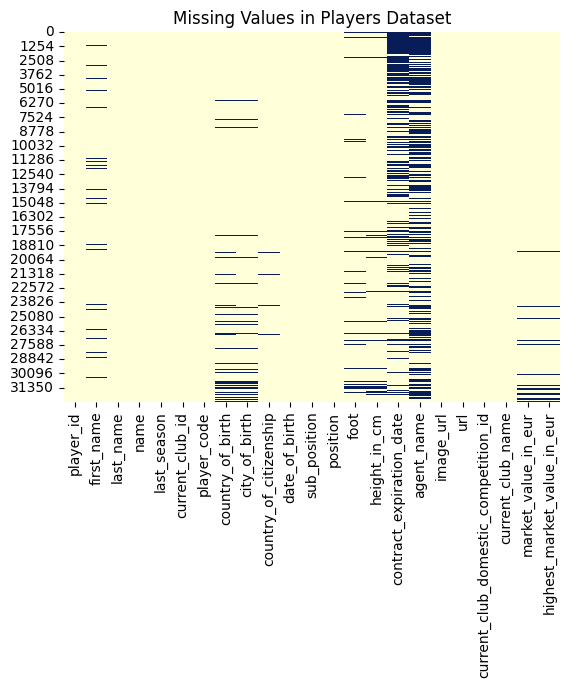

In [8]:
# Show missing values as a heatmap
sns.heatmap(players.isnull(), cbar=False, cmap='YlGnBu')
plt.title("Missing Values in Players Dataset")
plt.show()

### **Missing Values Analysis: Transfermarkt Players Dataset**
**✅ Dataset Overview:**
- Total Rows: 32,601

- Total Columns: 23

- Columns include player demographics, physical stats, market value, and club information.

- Most columns have near-complete data, but a few contain substantial missing values.

### ** Key Observations from info() and Missing Value Heatmap:**
**Perfectly Complete Columns:**

-  Columns like `player_id`, `name`, `last_season`, `current_club_id`, `position`, and `current_club_name` have no missing values — making them safe for modeling and analytics without preprocessing.

**Partially Missing but Important:**

- `height_in_cm` (~7% missing) → Reasonably complete and usable after median imputation.

- `foot` (preferred foot) and `sub_position` have moderate gaps (7–8%), still potentially useful.

- `market_value_in_eur` and `highest_market_value_in_eur` — important target variables — are missing in ~4.7% of rows.

**High Missingness (May Need Dropping):**

- `contract_expiration_date` (~37% missing)

- `agent_name` (~49% missing)

- These may not be recoverable and should likely be dropped unless directly needed.

**Location Information (Moderate Gaps):**

- `country_of_birth`, `city_of_birth`, and `country_of_citizenship` have gaps but may still be helpful for feature engineering or grouping players by geography.

**Rare Anomalies:**

- Only 47 rows have missing `date_of_birth`, which will affect age calculations. These rows can be dropped or set to a placeholder if age is critical.



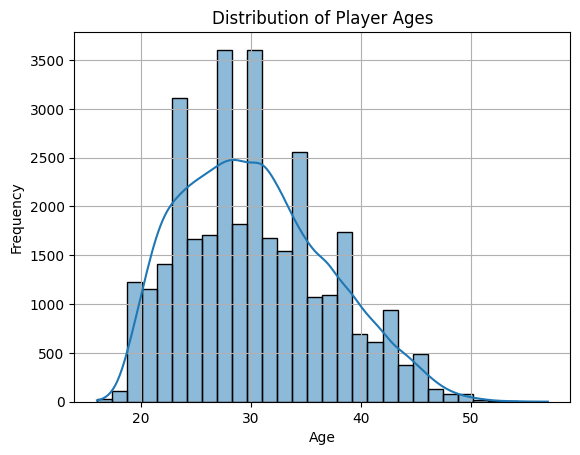

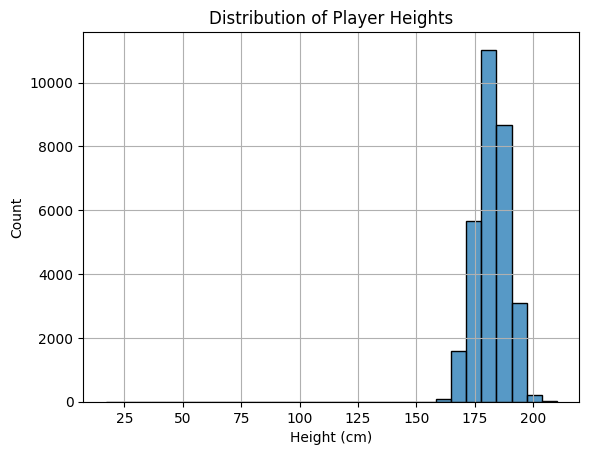

In [10]:
# Convert 'birth_date' to datetime format
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'], errors='coerce')

# Derive age based on year
players['age'] = 2025 - players['date_of_birth'].dt.year

# Plot histogram of ages
sns.histplot(players['age'].dropna(), bins=30, kde=True)
plt.title("Distribution of Player Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot histogram of player heights
sns.histplot(players['height_in_cm'].dropna(), bins=30)
plt.title("Distribution of Player Heights")
plt.xlabel("Height (cm)")
plt.grid(True)
plt.show()


### **Histogram Analysis**

**📈 Distribution of Player Ages**

- The player age distribution is slightly right-skewed, peaking around 28–30 years, which aligns with peak performance years in professional football. There's a healthy presence of young talent (18–25) and a noticeable taper as age increases, with very few players active beyond 40.

**📏 Distribution of Player Heights**

- Most professional footballers cluster between 170 cm and 190 cm, with the distribution sharply centered around 180 cm. A few outliers exist below 160 cm and above 200 cm, suggesting the presence of specialized roles like short midfielders and tall goalkeepers.



### Plot Market Value by Age

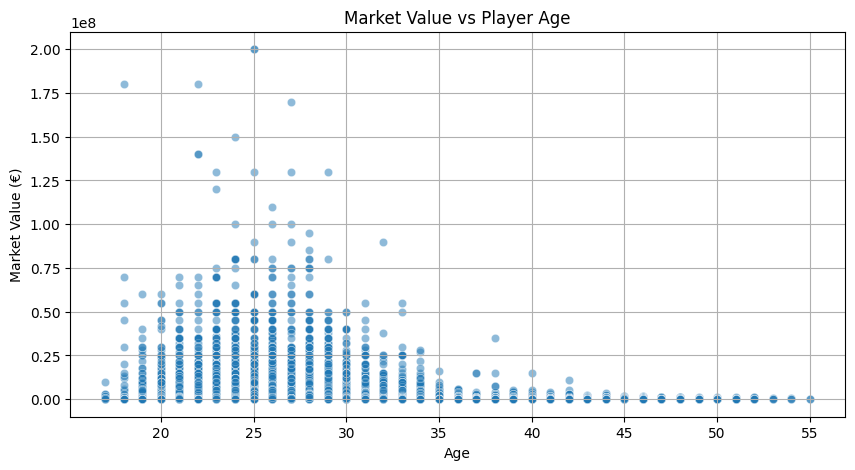

In [11]:
# Scatter plot of market value vs age
plt.figure(figsize=(10, 5))
sns.scatterplot(data=players, x='age', y='market_value_in_eur', alpha=0.5)
plt.title("Market Value vs Player Age")
plt.xlabel("Age")
plt.ylabel("Market Value (€)")
plt.grid(True)
plt.show()

### **Market Value vs Player Age (Scatterplot)**

- Market value tends to **peak between ages 23 to 28**, with a clear concentration of high-value players in this age bracket. After age 30, there’s a visible decline in market value, confirming that younger players are often perceived as more valuable due to longevity and resale potential.

### Boxplot of Market Value by Position

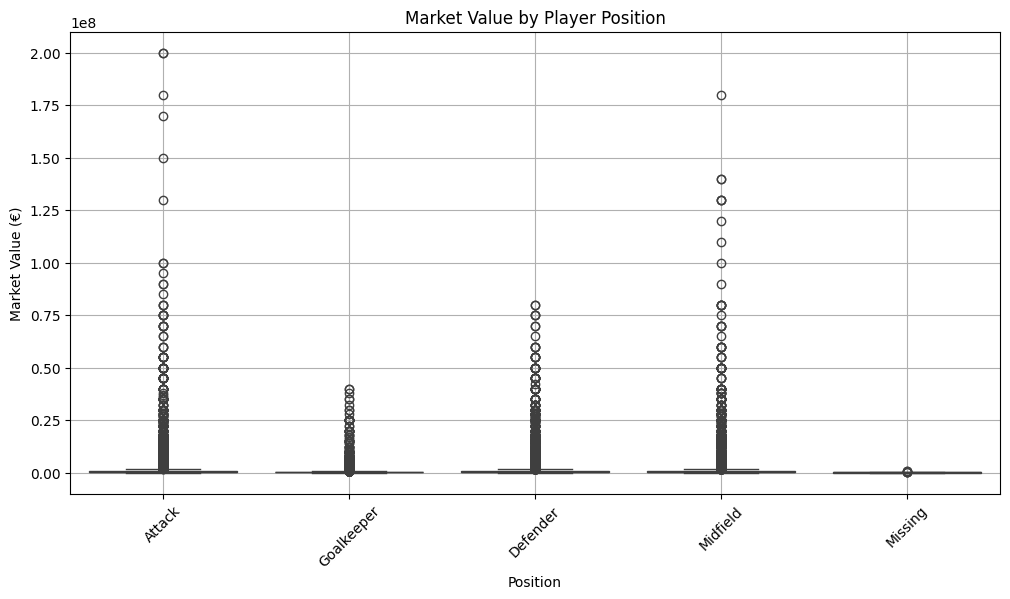

In [12]:
# Create boxplot for market value by player position
plt.figure(figsize=(12, 6))
sns.boxplot(data=players, x='position', y='market_value_in_eur')
plt.title("Market Value by Player Position")
plt.xlabel("Position")
plt.ylabel("Market Value (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### **Market Value by Player Position (Boxplot)**

- The boxplot reveals that **attacking players** have the **highest median market value**, with several outliers exceeding €100 million. Midfielders also show a wide value range, while **goalkeepers** generally have lower valuations. A small “Missing” group suggests some entries without defined positions.

### Correlation Heatmap (Numerical Fields)

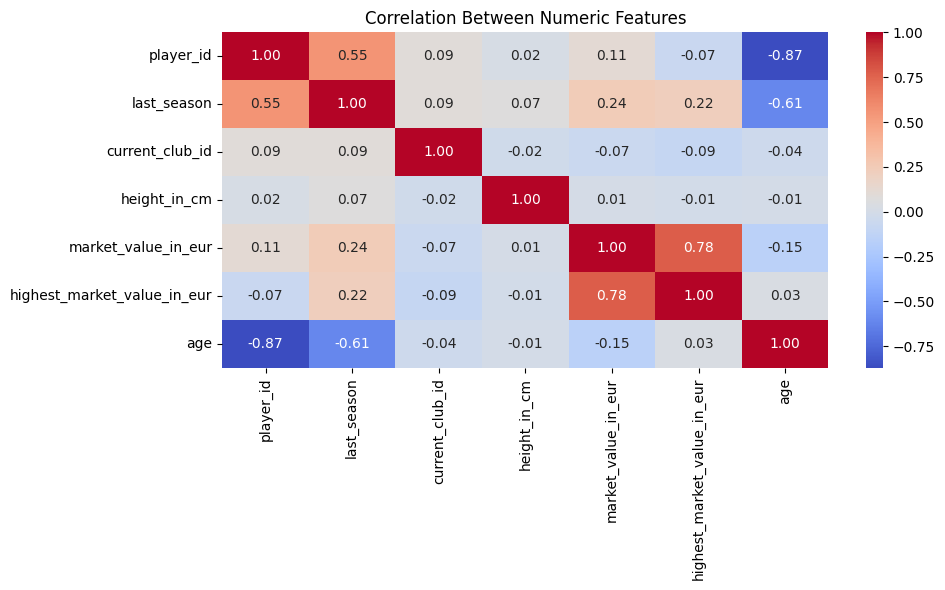

In [13]:
# Select only numeric fields for correlation matrix
numeric_cols = players.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.show()

### **Correlation Heatmap (Numerical Features)**

- The heatmap shows a **strong positive correlation** between `market_value_in_eur` and `highest_market_value_in_eur` (0.78), as expected. Interestingly, **age has a negative correlation** with both value metrics, reinforcing the decline in valuation with aging. Height and club ID show **very weak correlations**, indicating they might not be impactful predictors on their own.

### **Player Count by Country (Top 10 Nationalities)**

Gives context about dataset demographics.

<ipython-input-14-1fad37fba08c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="crest")


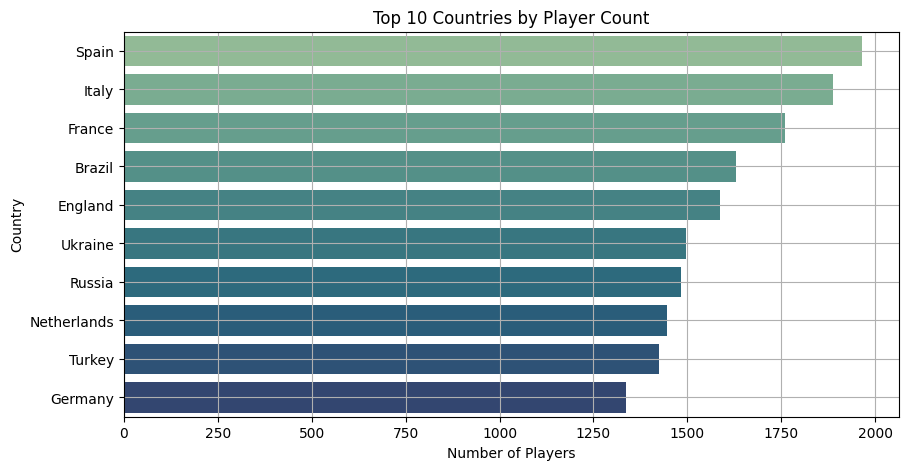

In [14]:
# Count top 10 nationalities
top_countries = players['country_of_citizenship'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="crest")
plt.title("Top 10 Countries by Player Count")
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.grid(True)
plt.show()


### **Outlier Detection**

Identify unusually high or low entries in features like height, market_value, or age.

In [15]:
# Basic IQR-based outlier detection for market value
Q1 = players['market_value_in_eur'].quantile(0.25)
Q3 = players['market_value_in_eur'].quantile(0.75)
IQR = Q3 - Q1
outliers = players[(players['market_value_in_eur'] < Q1 - 1.5 * IQR) | (players['market_value_in_eur'] > Q3 + 1.5 * IQR)]

print(f"Total outliers in market value: {len(outliers)}")
outliers[['name', 'age', 'position', 'market_value_in_eur']].head()


Total outliers in market value: 4387


,name,age,position,market_value_in_eur
29,Simon Rolfes,43.0,Midfield,2000000.0
103,Philipp Lahm,42.0,Defender,11000000.0
134,Robert Huth,41.0,Defender,2500000.0
138,Steven Gerrard,45.0,Midfield,1750000.0
143,Titus Bramble,44.0,Defender,2000000.0


In [16]:
# Make a copy to keep original data safe
cleaned_players = players.copy()


# These columns are either irrelevant or too incomplete for modeling
columns_to_drop = [
    'image_url', 'url', 'agent_name', 'contract_expiration_date',
    'player_code', 'city_of_birth', 'current_club_domestic_competition_id'
]
cleaned_players.drop(columns=columns_to_drop, inplace=True)


# Drop rows with missing market value, age, or date of birth (to ensure valid targets)
cleaned_players.dropna(subset=['market_value_in_eur', 'highest_market_value_in_eur', 'date_of_birth'], inplace=True)


cleaned_players['date_of_birth'] = pd.to_datetime(cleaned_players['date_of_birth'], errors='coerce')
cleaned_players['age'] = 2025 - cleaned_players['date_of_birth'].dt.year
cleaned_players.dropna(subset=['age'], inplace=True)


# Impute height with median and foot with mode
cleaned_players['height_in_cm'].fillna(cleaned_players['height_in_cm'].median(), inplace=True)
cleaned_players['foot'].fillna(cleaned_players['foot'].mode()[0], inplace=True)

cleaned_players.reset_index(drop=True, inplace=True)

print("Cleaned Dataset Shape:", cleaned_players.shape)
cleaned_players.head()

Cleaned Dataset Shape: (31046, 17)


<ipython-input-16-f2b74b81d0ac>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_players['height_in_cm'].fillna(cleaned_players['height_in_cm'].median(), inplace=True)
<ipython-input-16-f2b74b81d0ac>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

,player_id,first_name,last_name,name,last_season,current_club_id,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_name,market_value_in_eur,highest_market_value_in_eur,age
0,10,Miroslav,Klose,Miroslav Klose,2015,398,Poland,Germany,1978-06-09,Centre-Forward,Attack,right,184.0,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,47
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,Germany,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.0,Borussia Dortmund,750000.0,8000000.0,45
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,Bulgaria,Bulgaria,1981-01-30,Centre-Forward,Attack,right,183.0,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,44
3,77,NaN,Lúcio,Lúcio,2012,506,Brazil,Brazil,1978-05-08,Centre-Back,Defender,right,183.0,Juventus Football Club,200000.0,24500000.0,47
4,80,Tom,Starke,Tom Starke,2017,27,East Germany (GDR),Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.0,FC Bayern München,100000.0,3000000.0,44


In [26]:
# Save the cleaned dataset to a CSV file in Colab's file system
cleaned_players.to_csv("cleaned_tm_players_dataset_v2.csv", index=False)

# Code to trigger download of the CSV file
from google.colab import files
files.download("cleaned_players_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Feature Engineering

In [21]:
# Load the cleaned dataset you uploaded
players_fe = pd.read_csv("/content/cleaned_tm_players_dataset_v2.csv")

# Check available columns
print(players_fe.columns.tolist())

['player_id', 'first_name', 'last_name', 'name', 'last_season', 'current_club_id', 'country_of_birth', 'country_of_citizenship', 'date_of_birth', 'sub_position', 'position', 'foot', 'height_in_cm', 'current_club_name', 'market_value_in_eur', 'highest_market_value_in_eur', 'age']


In [25]:
# Create categorical age brackets — useful for grouping and visualization
players_fe['age_group'] = pd.cut(
    players_fe['age'],
    bins=[15, 21, 26, 30, 35, 50],
    labels=['Teen', 'Young', 'Prime', 'Experienced', 'Veteran']
)

# Helps normalize the skewed distribution of player market values
players_fe['value_log'] = np.log1p(players_fe['market_value_in_eur'])

# Converts position text labels to numeric codes (needed for ML models)
players_fe['position_encoded'] = players_fe['position'].astype('category').cat.codes

# Check new feature columns
players_fe[['name', 'age', 'age_group', 'value_log', 'position', 'position_encoded']].head()

# Save feature-enhanced version
players_fe.to_csv("cleaned_tm_players_dataset_v3_with_features.csv", index=False)

# Trigger download in Google Colab
from google.colab import files
files.download("players_dataset_with_features_final.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>